<a href="https://colab.research.google.com/github/wwilman/university_code/blob/main/Projekty%20na%20j%C4%99zyki%20programowania/Dataquest_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# List of taken courses


# Python for Data Science: Fundamentals (done and checked)

## Data load

In [ ]:
from csv import reader
import pandas as pd

#The Google Play dataset 
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

#The App Store dataset
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

## Basic explore of the data

In [ ]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [ ]:
print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


In [ ]:
print(android_header)
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


## Deleting damaged row

In [ ]:
print(android[10472])  #damaged row
print('\n')
print(android_header)
print('\n')
print(android[0])      # correct row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


In [ ]:
print(len(android))
del android[10472]  
print(len(android)) # to check if one row was deleted

10841
10840


## Remove the duplicates

In [ ]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


In [ ]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

print('Expected length:', len(android) - 1181)

print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


In [ ]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


## Removing apps that are not in English

In [ ]:
#example app
print(android_clean[4412][0])



中国語 AQリスニング


In [ ]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

In [ ]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)
        
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

## Keeping the free apps

In [ ]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
print(len(android_final))
print(len(ios_final))

8864
3222


## Apps that atract more users - most common 

In [ ]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0]
              
display_table(ios_final, -5)
display_table(android_final, 1)
display_table(android_final, -4)


## Apps that atract more users - most popular in App Store

In [ ]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
        
genres_ios = freq_table(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) 


for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])



Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0
Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5
Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus 

## Apps that atract more users - most popular in Google Play

In [ ]:
display_table(android_final, 5)

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


In [ ]:
categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

In [ ]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

In [ ]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

In [ ]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

In [ ]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])


Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


In [ ]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])



Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

In [ ]:
#end

# Python for Data Science: Intermediate (done and checked)

## Data load

In [ ]:
!wget http://bioinf-mw.bihz.upwr.edu.pl/students-data/HN_posts_year_to_Sep_26_2016.csv

from csv import reader

opened_file = open('HN_posts_year_to_Sep_26_2016.csv')
read_file = reader(opened_file)
hn = list(read_file)

print(hn[0:5])

--2021-03-29 13:21:13--  http://bioinf-mw.bihz.upwr.edu.pl/students-data/HN_posts_year_to_Sep_26_2016.csv
Resolving bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)... 156.17.187.238
Connecting to bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)|156.17.187.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47360538 (45M) [text/csv]
Saving to: ‘HN_posts_year_to_Sep_26_2016.csv.1’

HN_posts_year_to_Se 100%[===================>]  45.17M  6.03MB/s    in 10s     

2021-03-29 13:21:24 (4.54 MB/s) - ‘HN_posts_year_to_Sep_26_2016.csv.1’ saved [47360538/47360538]

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/

## Separating and removing headers

In [ ]:
headers = hn[0]
print(headers)
hn = hn[1:]
print(hn[0:3]) 

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
[['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19']]


## Check number of posts per each type (ask and show)

In [ ]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    if title.lower().startswith("ask hn"):
        ask_posts.append(row)
    elif title.lower().startswith("show hn"):
        show_posts.append(row)
    else:
        other_posts.append(row)

print('Number of ask posts:', len(ask_posts))
print('Number of show posts:',len(show_posts))
print('Number of other posts:',len(other_posts))

Number of ask posts: 9139
Number of show posts: 10158
Number of other posts: 273822


## Number of comments per type

In [ ]:
total_ask_comments = 0 

for row in ask_posts:
    comments = int(row[4])
    total_ask_comments += comments 

print('Total number of ask comments:', total_ask_comments)

avg_ask_comments = total_ask_comments / len(ask_posts)

print('Average of ask comments:', avg_ask_comments)

total_show_comments = 0 

for row in show_posts:
    comments = int(row[4])
    total_show_comments += comments 

print('Total number of show comments:', total_show_comments)

avg_show_comments = total_show_comments / len(show_posts)

print('Average of show comments:', avg_show_comments)

Total number of ask comments: 94986
Average of ask comments: 10.393478498741656
Total number of show comments: 49633
Average of show comments: 4.886099625910612


## Determine if ask posts created at a certain time are more likely to receive comments

In [ ]:
import datetime as dt

result_list = []

for row in ask_posts:
    result_list.append([row[6], int(row[4])])
 
print('Result_list:', result_list[0:5])  

counts_by_hour = {}
comments_by_hour = {}
date_format = "%m/%d/%Y %H:%M"

for row in result_list:
    date = dt.datetime.strptime(row[0], date_format)
    hour = dt.datetime.strftime(date, "%H")
    comment = row[1]
    
    if hour in counts_by_hour:
        counts_by_hour[hour] += 1 
        comments_by_hour[hour] += comment
    else:
        counts_by_hour[hour] = 1 
        comments_by_hour[hour] = comment
    

comments_by_hour

Result_list: [['9/26/2016 2:53', 7], ['9/26/2016 1:17', 3], ['9/25/2016 22:57', 0], ['9/25/2016 22:48', 3], ['9/25/2016 21:50', 2]]


{'00': 2277,
 '01': 2089,
 '02': 2996,
 '03': 2154,
 '04': 2360,
 '05': 1838,
 '06': 1587,
 '07': 1585,
 '08': 2362,
 '09': 1477,
 '10': 3013,
 '11': 2797,
 '12': 4234,
 '13': 7245,
 '14': 4972,
 '15': 18525,
 '16': 4466,
 '17': 5547,
 '18': 4877,
 '19': 3954,
 '20': 4462,
 '21': 4500,
 '22': 3372,
 '23': 2297}

## Identifing average number of comments per post during each hour of the day

In [ ]:
avg_comments_hour = [] 

for hour in counts_by_hour:
    avg_comments_hour.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])

avg_comments_hour

[['02', 11.137546468401487],
 ['01', 7.407801418439717],
 ['22', 8.804177545691905],
 ['21', 8.687258687258687],
 ['19', 7.163043478260869],
 ['17', 9.449744463373083],
 ['15', 28.676470588235293],
 ['14', 9.692007797270955],
 ['13', 16.31756756756757],
 ['11', 8.96474358974359],
 ['10', 10.684397163120567],
 ['09', 6.653153153153153],
 ['07', 7.013274336283186],
 ['03', 7.948339483394834],
 ['23', 6.696793002915452],
 ['20', 8.749019607843136],
 ['16', 7.713298791018998],
 ['08', 9.190661478599221],
 ['00', 7.5647840531561465],
 ['18', 7.94299674267101],
 ['12', 12.380116959064328],
 ['04', 9.7119341563786],
 ['06', 6.782051282051282],
 ['05', 8.794258373205741]]

## Sort results

In [ ]:
swap_avg_by_hour = []

for row in avg_comments_hour:
    swap_avg_by_hour.append([row[1], row[0]])

sorted_swap = sorted(swap_avg_by_hour, reverse = True)

print('Swaped list:', sorted_swap)

Swaped list: [[28.676470588235293, '15'], [16.31756756756757, '13'], [12.380116959064328, '12'], [11.137546468401487, '02'], [10.684397163120567, '10'], [9.7119341563786, '04'], [9.692007797270955, '14'], [9.449744463373083, '17'], [9.190661478599221, '08'], [8.96474358974359, '11'], [8.804177545691905, '22'], [8.794258373205741, '05'], [8.749019607843136, '20'], [8.687258687258687, '21'], [7.948339483394834, '03'], [7.94299674267101, '18'], [7.713298791018998, '16'], [7.5647840531561465, '00'], [7.407801418439717, '01'], [7.163043478260869, '19'], [7.013274336283186, '07'], [6.782051282051282, '06'], [6.696793002915452, '23'], [6.653153153153153, '09']]


## Top 5 with greatest numer of comments

In [ ]:
print("Top 5 Hours for Ask Posts Comments")
for avg, hr in sorted_swap[0:5]:
   print('{}: {avg:,.2f} average comments per post'. format(dt.datetime.strptime(hr,'%H').strftime("%H"), avg = avg))

Top 5 Hours for Ask Posts Comments
15: 28.68 average comments per post
13: 16.32 average comments per post
12: 12.38 average comments per post
02: 11.14 average comments per post
10: 10.68 average comments per post


# Pandas and NumPy Fundamentals (done and checked)

## Data load

In [ ]:
!wget http://bioinf-mw.bihz.upwr.edu.pl/students-data/autos-dataquest.csv
import pandas as pd
import numpy as np
import re
df = pd.read_csv("autos-dataquest.csv", encoding='Windows-1252')
df.info()

--2021-04-12 13:08:46--  http://bioinf-mw.bihz.upwr.edu.pl/students-data/autos-dataquest.csv
Resolving bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)... 156.17.187.238
Connecting to bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)|156.17.187.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9617699 (9.2M) [text/csv]
Saving to: ‘autos-dataquest.csv’

autos-dataquest.csv 100%[===================>]   9.17M  2.03MB/s    in 4.5s    

2021-04-12 13:08:50 (2.03 MB/s) - ‘autos-dataquest.csv’ saved [9617699/9617699]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null

## Cleaning and renaming columns



In [ ]:
df.columns
def clean_columns(col):
    col = col.replace("yearOfRegistration", "registration_year")
    col = col.replace("monthOfRegistration", "registration_month")
    col = col.replace("notRepairedDamage", "unrepaired_damage")
    col = col.replace("dateCreated", "ad_created")
    col = col.replace("offerType", "offer_type")
    col = col.replace("vehicleType", "vehicle_type")
    col = col.replace("powerPS", "power_ps")
    col = col.replace("fuelType", "fuel_type")
    col = col.replace("nrOfPictures", "nr_of_pictures")
    col = col.replace("postalCode", "postal_code")
    col = col.replace("lastSeen", "last_seen")
    col = col.replace("dateCrawled", "date_crawled")
    return col

df_columns = df.columns
new_columns = []

for c in df_columns:
    c = clean_columns(c)
    new_columns.append(c)
    
df.columns = new_columns

df.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Initial Data Exploration and Cleaning

In [ ]:
df.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-27 22:55:05,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## Explore of odometer and prices

In [ ]:
df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(int)
df["odometer"] = df["odometer"].str.replace("km", "").str.replace(",", "").astype(int)
df = df.rename({"odometer": "odometer_km"}, axis=1)
print(df["odometer_km"].unique().shape)
print(df["odometer_km"].describe())
print(df["odometer_km"].value_counts().sort_index(ascending=False))
print(df["price"].unique().shape)
print(df["price"].describe())
print(df["price"].value_counts().head(15))
print(df["price"].value_counts().sort_index(ascending=False).head(20))
print(df["price"].value_counts().sort_index(ascending=False).tail(20))


(13,)
count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64
(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
Name: price, dtype: int64
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
12345

In [ ]:
df = df[(df["price"] > 0) & (df["price"] < 351000)]
df["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

## Analyzing the date columns

In [ ]:
print(df["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_index())

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64


In [ ]:
print(df["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index())

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64


In [ ]:
print(df["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index())
print('\n')
print(df["ad_created"].str[:10].value_counts(dropna=False).sort_values(ascending=False).head(60))


2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64


2016-04-03    1887
2016-03-20    1843
2016-03-21    1825
2016-04-04    1790
2016-03-12    1785
2016-03-14    1709
2016-04-02    1707
2016-03-28    1699
2016-03-07    1687
2016-03-29    1653
2016-03-15    1652
2016-03-19    1636
2016-04-01    1636
2016-03-30    1627
2016-03-08    1618
2016-03-09    1610
2016-03-11    1598
2016-03-22    1593
2016-03-26    1567
2016-03-23    1557
2016-03-10    1549
2016-03-31    1548
2016-03-25    1542
2016-03-17    1519
2016-03-27    1505
2016-03-16    1463
2016-03-24    1422
2016-03-05    1112
2016-03-13     826
2016-03-06     744
2016-03-18     660
2016-04-05     574
2016-04-06     158
2016-03-04      72
2016-04-07      61
2016-03-03      42
2016-02-28      

## Analyzing Registration Year Data

In [ ]:
df["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [ ]:
df = df[df["registration_year"].between(1900, 2016)]
df["registration_year"].value_counts(normalize=True)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
          ...   
1938    0.000021
1948    0.000021
1927    0.000021
1931    0.000021
1952    0.000021
Name: registration_year, Length: 78, dtype: float64

In [ ]:
df["registration_year"].value_counts(normalize=True).head(13).sum()

0.7085109573488143

## Explore of Brand Data

In [ ]:
df["brand"].value_counts(normalize=True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

In [ ]:
brands = df["brand"].value_counts(normalize=True)
selected_brands = brands[brands > 0.01].index
print(selected_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai'],
      dtype='object')


In [ ]:
brands_mean_price = {}
for brand in selected_brands:
    brands_mean_price[brand] = int(df.loc[df["brand"] == brand, "price"].mean())

brands_mean_price

{'audi': 9336,
 'bmw': 8332,
 'citroen': 3779,
 'fiat': 2813,
 'ford': 3749,
 'hyundai': 5365,
 'mazda': 4112,
 'mercedes_benz': 8628,
 'nissan': 4743,
 'opel': 2975,
 'peugeot': 3094,
 'renault': 2474,
 'seat': 4397,
 'skoda': 6368,
 'smart': 3580,
 'toyota': 5167,
 'volkswagen': 5402}

## Explore of Average Mileage

In [ ]:
brands_mean_mileage = {}
for brand in selected_brands:
    brands_mean_mileage[brand] = int(df.loc[df["brand"] == brand, "odometer_km"].mean())

brands_mean_mileage

{'audi': 129157,
 'bmw': 132572,
 'citroen': 119694,
 'fiat': 117121,
 'ford': 124266,
 'hyundai': 106442,
 'mazda': 124464,
 'mercedes_benz': 130788,
 'nissan': 118330,
 'opel': 129310,
 'peugeot': 127153,
 'renault': 128071,
 'seat': 121131,
 'skoda': 110848,
 'smart': 99326,
 'toyota': 115944,
 'volkswagen': 128707}

In [ ]:

s_brand_mean_price = pd.Series(brands_mean_price).sort_values(ascending=False)
s_brand_mean_mileage = pd.Series(brands_mean_mileage).sort_values(ascending=False)

df_brand_means = pd.DataFrame(s_brand_mean_price, columns = ['mean_price'])
df_brand_means["mean_mileage"] = s_brand_mean_mileage

df_brand_means
ordered_brands = brands[brands > 0.01]
print(ordered_brands)

df_brand_means["common_brands"] = ordered_brands
df_brand_means.sort_values(by=['common_brands'], ascending=False)



volkswagen       0.211264
bmw              0.110045
opel             0.107581
mercedes_benz    0.096463
audi             0.086566
ford             0.069900
renault          0.047150
peugeot          0.029841
fiat             0.025642
seat             0.018273
skoda            0.016409
nissan           0.015274
mazda            0.015188
smart            0.014160
citroen          0.014010
toyota           0.012703
hyundai          0.010025
Name: brand, dtype: float64


,mean_price,mean_mileage,common_brands
volkswagen,5402,128707,0.211264
bmw,8332,132572,0.110045
opel,2975,129310,0.107581
mercedes_benz,8628,130788,0.096463
audi,9336,129157,0.086566
ford,3749,124266,0.069900
renault,2474,128071,0.047150
peugeot,3094,127153,0.029841
fiat,2813,117121,0.025642
seat,4397,121131,0.018273


# Coursera: PREDICTING HEART DISEASE FROM CLINICAL AND LABORATORIAL DATA USING KNN (done)

## The Atribute information 

1. age
2. sex
3. cp :chest pain type (4 values)
4. trestbs :resting blood pressure
5. chol :serum cholestoral in mg/dl 
6. fbs :fasting blood sugar > 120 mg/dl
7. restecg :resting electrocardiographic results (values 0,1,2)
8. thalach :
9. exang :maximum heart rate achieved
exercise induced angina
10. oldpeak :ST depression induced by exercise relative to rest
11. slope :the slope of the peak exercise ST segment
12. ca :number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target :0 is no heart disease and 1 is heart disease

## Aim of the prediction

Developing a predictive model capable of accurately predicting the presence or absence of heart disease from clinical and laboratory data using a K-Nearest-Neighbors Classifier, based on [Coursera course](https://www.coursera.org/projects/predicting-heart-disease-using-machine-learning).

## Data load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Exploratory Data Analysis

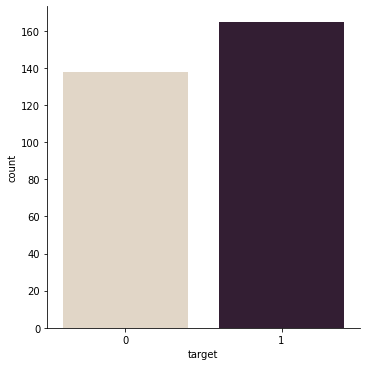

In [ ]:
sns.catplot(x='target', kind='count', palette='ch:.25', data = data)

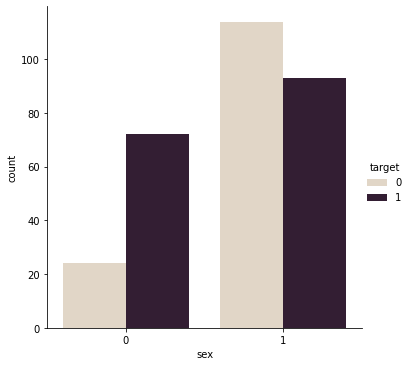

In [ ]:
sns.catplot(x='sex',kind='count',hue='target', palette='ch:.25', data=data)

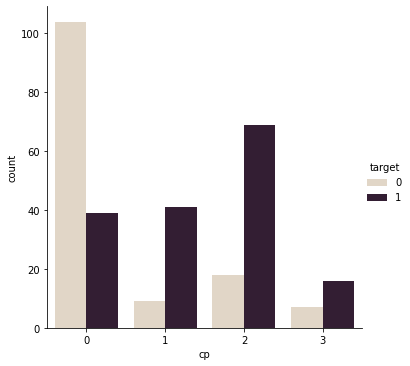

In [ ]:
sns.catplot(x='cp',kind='count',hue='target', palette='ch:.25', data=data)

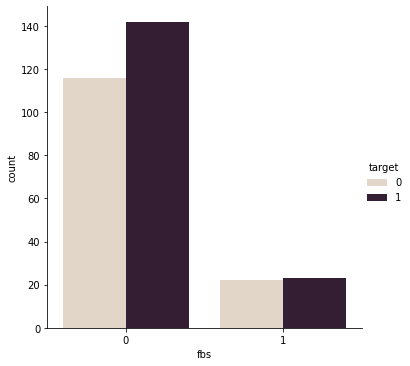

In [ ]:
sns.catplot(x='fbs',kind='count',hue='target', palette='ch:.25', data=data)

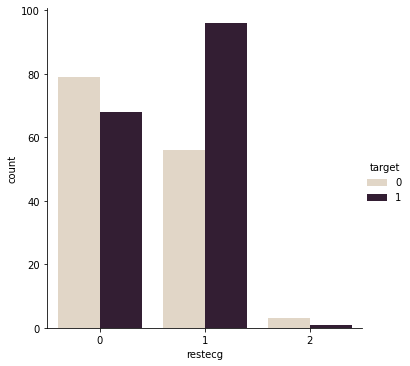

In [ ]:
sns.catplot(x='restecg',kind='count',hue='target', palette='ch:.25', data=data)

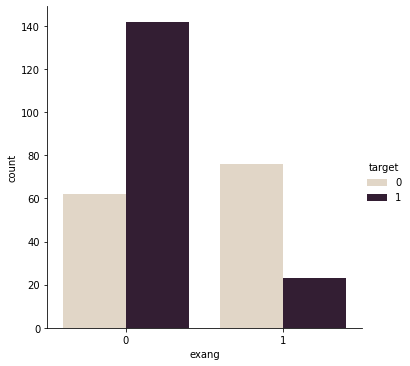

In [ ]:
sns.catplot(x='exang',kind='count',hue='target', palette='ch:.25', data=data)

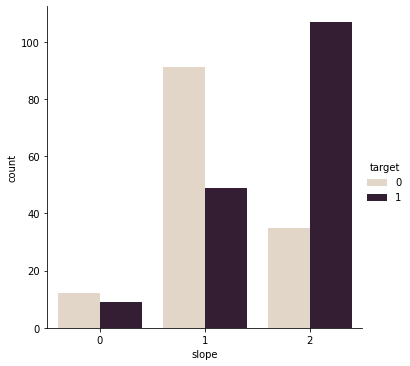

In [ ]:
sns.catplot(x='slope',kind='count',hue='target', palette='ch:.25', data=data)

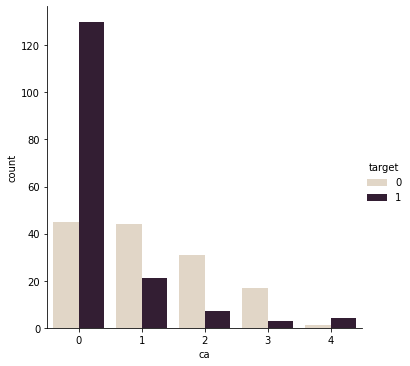

In [ ]:
sns.catplot(x='ca',kind='count',hue='target', palette='ch:.25', data=data)

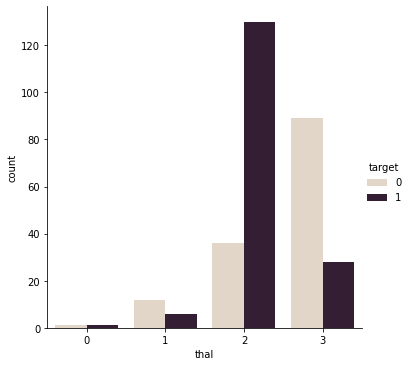

In [ ]:
sns.catplot(x='thal',kind='count',hue='target', palette='ch:.25', data=data)

In [ ]:
data[['age','trestbps','chol','thalach','oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


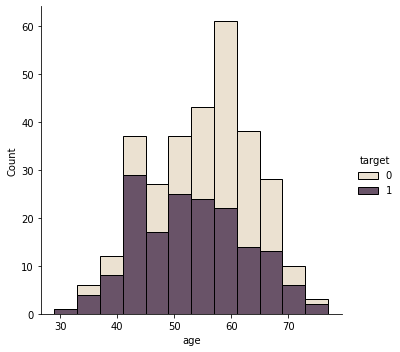

In [ ]:
sns.displot(x='age',multiple='stack',hue='target', palette='ch:.25',data=data)

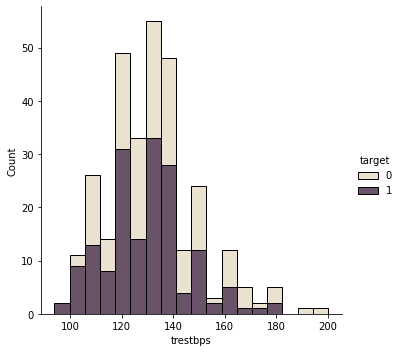

In [ ]:
sns.displot(x='trestbps',multiple='stack',hue='target', palette='ch:.25',data=data)

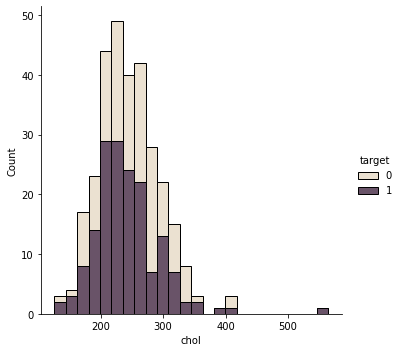

In [ ]:
sns.displot(x='chol',multiple='stack',hue='target', palette='ch:.25',data=data)

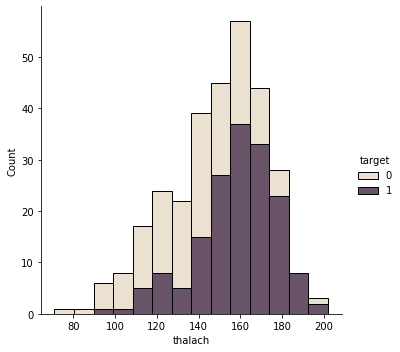

In [ ]:
sns.displot(x='thalach',multiple='stack',hue='target', palette='ch:.25',data=data)

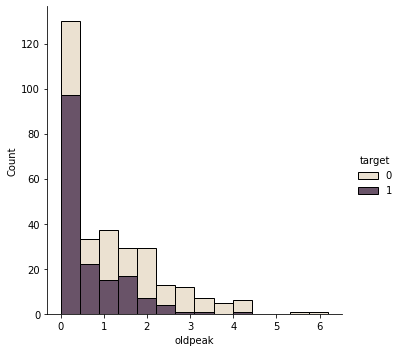

In [ ]:
sns.displot(x='oldpeak',multiple='stack',hue='target', palette='ch:.25',data=data)

## Spliting and pre-processing the data 

In [ ]:
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )

In [ ]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## Training the model

In [ ]:
knn =KNeighborsClassifier()
parameters = {'n_neighbors':[3,5,7,9,11], 'weights':['uniform','distance']}

In [ ]:
grid = GridSearchCV(knn, parameters, cv=4, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid.best_params_) #best parameter

{'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
model = grid.best_estimator_ #best model

## Evaluating the model

In [ ]:
model.score(x_test,y_test)

0.9016393442622951

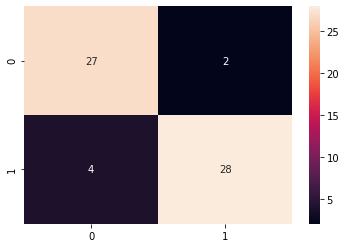

In [ ]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
TP = 28
FP = 2
TN = 27
FN = 4
sensitivity = TP / (TP + FN)*100
specificity = TN / (TN + FP)*100
ppv = TP/ (TP + FP)* 100
npv = TN/ (TN + FN)*100

In [ ]:
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

Sensitivity: 87.5 %  Specificity: 93.10344827586206 %  positive predictive value: 93.33333333333333 %  negative predictive value: 87.09677419354838 %


In [ ]:
probs = model.predict_proba(x_test)[:,1]
auc = metrics.roc_auc_score(y_test, probs)
print(auc)

0.9154094827586208


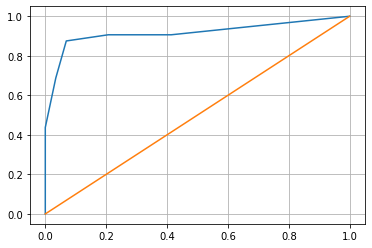

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

# Data Visualization Fundamentals (done)

## Data load

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!wget !wget http://bioinf-mw.bihz.upwr.edu.pl/students-data/Metro_Interstate_Traffic_Volume.csv
traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()
traffic.tail()
traffic.info()

--2021-04-19 14:44:46--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2021-04-19 14:44:46--  http://bioinf-mw.bihz.upwr.edu.pl/students-data/Metro_Interstate_Traffic_Volume.csv
Resolving bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)... 156.17.187.238
Connecting to bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)|156.17.187.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3237208 (3.1M) [text/csv]
Saving to: ‘Metro_Interstate_Traffic_Volume.csv.1’

Metro_Interstate_Tr 100%[===================>]   3.09M   835KB/s    in 3.8s    

2021-04-19 14:44:50 (835 KB/s) - ‘Metro_Interstate_Traffic_Volume.csv.1’ saved [3237208/3237208]

FINISHED --2021-04-19 14:44:50--
Total wall clock time: 4.3s
Downloaded: 1 files, 3.1M in 3.8s (835 KB/s)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Nu

##About traffic volume

In [ ]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

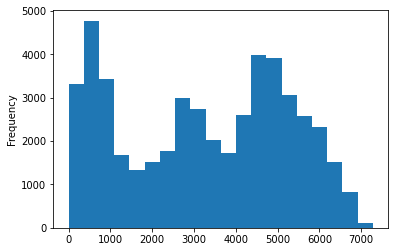

In [ ]:
traffic['traffic_volume'].plot.hist(bins=20)

##Daytime vs Nighttime traffic

In [ ]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


In [ ]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [ ]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

(1900.0, 2100.0)

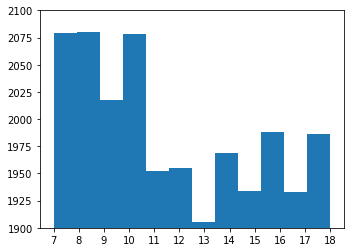

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
d=traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
plt.hist(d['date_time'].dt.hour,bins=12)
plt.xticks(range(7,19))
plt.ylim(ymin=1900, ymax = 2100)


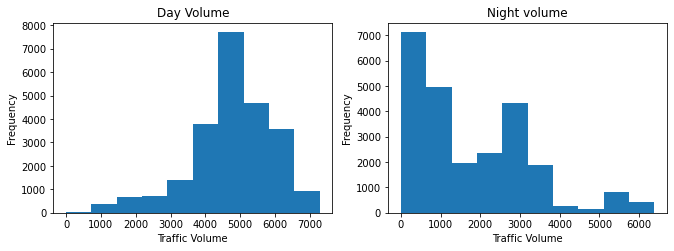

In [ ]:
fig = plt.figure(figsize=(11,3.5))
ax1 = plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
ax1.hist(day['traffic_volume'])
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Traffic Volume')
ax1.set_title('Day Volume')
ax2.hist(night['traffic_volume'])
ax2.set_title('Night volume')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Traffic Volume')
plt.show()

## Day time heavy traffic indicator

In [ ]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

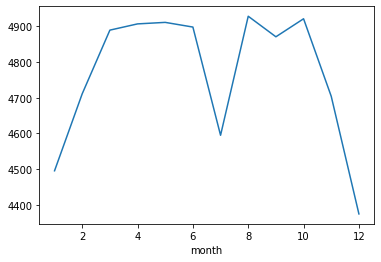

In [ ]:
by_month['traffic_volume'].plot.line()

In [ ]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

In [ ]:
day['year'] = day['date_time'].dt.year
by_years= day.groupby('year').mean()
by_years['traffic_volume']  

year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64

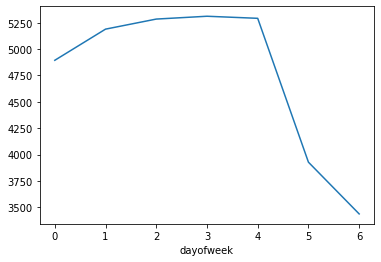

In [ ]:
by_dayofweek['traffic_volume'].plot.line()

Text(0, 0.5, 'Traffic Volume')

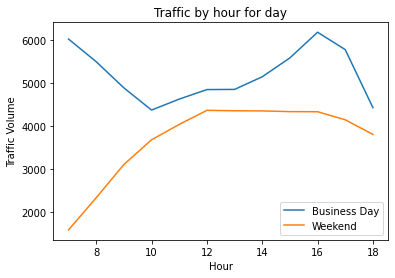

In [ ]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] 
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_business['traffic_volume'].plot.line(label = 'Business Day')
by_hour_weekend['traffic_volume'].plot.line(label = 'Weekend')
plt.legend(loc='lower right')
plt.title('Traffic by hour for day')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

## Day time weather indication

In [ ]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
year             -0.003557
hour              0.172704
Name: traffic_volume, dtype: float64

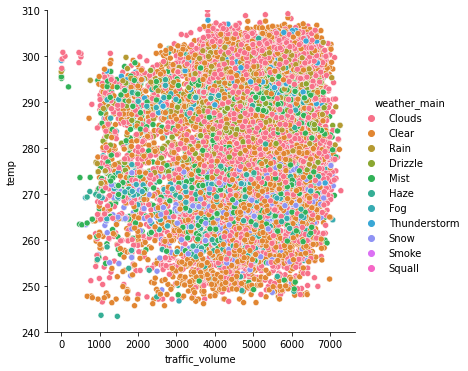

In [ ]:
scatter=sns.relplot(data=day,x='traffic_volume',y='temp',hue='weather_main')
scatter.set(ylim=(240, 310))

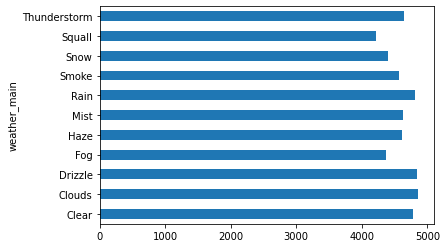

In [ ]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

## Types of weather

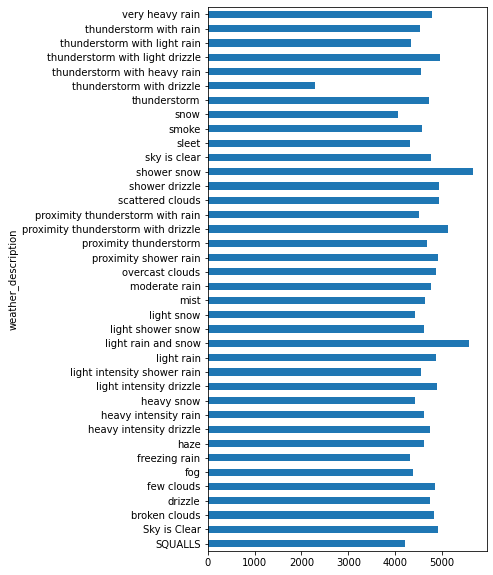

In [ ]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

## Night time heavy traffic indicator

In [ ]:
night['month'] = night['date_time'].dt.month
n_by_month = night.groupby('month').mean()
n_by_month['traffic_volume']

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

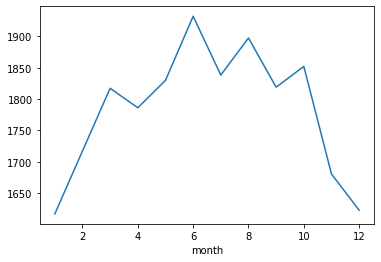

In [ ]:
n_by_month['traffic_volume'].plot.line()

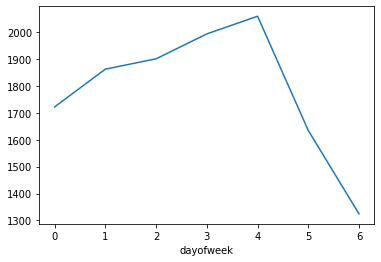

In [ ]:
night['dayofweek'] = night['date_time'].dt.dayofweek
n_by_dayofweek = night.groupby('dayofweek').mean()
n_by_dayofweek['traffic_volume'].plot.line()

In [ ]:
night['year'] = night['date_time'].dt.year
nby_years= night.groupby('year').mean()
nby_years['traffic_volume']  

year
2012    1678.183559
2013    1776.179115
2014    1762.013115
2015    1793.439856
2016    1739.358719
2017    1857.150670
2018    1796.524133
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Traffic Volume')

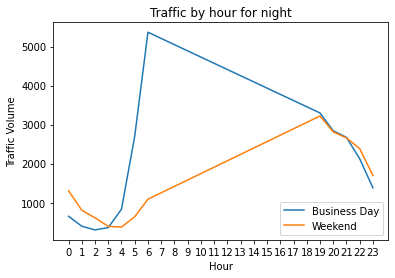

In [ ]:
night['hour'] = night['date_time'].dt.hour
nbussiness_days = night.copy()[night['dayofweek'] <= 4] # 4 == Friday
nweekend = night.copy()[night['dayofweek'] >= 5] # 5 == Saturday
nby_hour_business = nbussiness_days.groupby('hour').mean()
nby_hour_weekend = nweekend.groupby('hour').mean()

nby_hour_business['traffic_volume'].plot.line(label = 'Business Day')
nby_hour_weekend['traffic_volume'].plot.line(label = 'Weekend')
plt.legend(loc='lower right')
plt.title('Traffic by hour for night')
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.ylabel('Traffic Volume')

## Night time weather indicator

In [ ]:
night.corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
month             0.001342
dayofweek        -0.073636
year              0.018544
hour              0.454586
Name: traffic_volume, dtype: float64

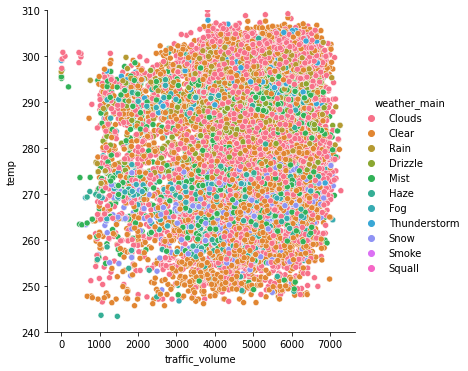

In [ ]:
scatter=sns.relplot(data=day,x='traffic_volume',y='temp',hue='weather_main')
scatter.set(ylim=(240, 310))



# Data Cleaning and Analysis (done)

## Data load

In [ ]:
import pandas as pd
import numpy as np

!wget http://bioinf-mw.bihz.upwr.edu.pl/students-data/tafe-employee-exit-survey-access-database-december-2013.csv
!wget http://bioinf-mw.bihz.upwr.edu.pl/students-data/dete-exit-survey-january-2014.csv

dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv')
tafe_survey = pd.read_csv('tafe-employee-exit-survey-access-database-december-2013.csv', engine='python')

dete_survey.info()

--2021-04-19 14:49:54--  http://bioinf-mw.bihz.upwr.edu.pl/students-data/tafe-employee-exit-survey-access-database-december-2013.csv
Resolving bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)... 156.17.187.238
Connecting to bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)|156.17.187.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363798 (355K) [text/csv]
Saving to: ‘tafe-employee-exit-survey-access-database-december-2013.csv.1’

tafe-employee-exit- 100%[===================>] 355.27K   213KB/s    in 1.7s    

2021-04-19 14:49:56 (213 KB/s) - ‘tafe-employee-exit-survey-access-database-december-2013.csv.1’ saved [363798/363798]

--2021-04-19 14:49:56--  http://bioinf-mw.bihz.upwr.edu.pl/students-data/dete-exit-survey-january-2014.csv
Resolving bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)... 156.17.187.238
Connecting to bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)|156.17.187.238|:80... connected.
HTTP request sent, awaiting r

In [ ]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [ ]:
dete_survey.isnull().sum() #missing data

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [ ]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [ ]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. ����Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induct

## Identyfinfg missing values and droping unnecessary columns

In [ ]:
# dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv', na_values='Not Stated')

In [ ]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [ ]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    int64  
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

## Cleaning column names

In [ ]:
dete_survey_updated.columns = (dete_survey_updated.columns.str.lower() .str.strip() .str.replace(' ','_') )
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [ ]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
                                    'CESSATION YEAR': 'cease_date',
                                    'Reason for ceasing employment': 'separationtype',
                                    'Gender. What is your Gender?': 'gender',
                                    'CurrentAge. Current Age': 'age',
                                    'Employment Type. Employment Type': 'employment_status',
                                    'Classification. Classification': 'position',
                                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',              
                                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                                     })
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. ����What is your Gender?', 'CurrentAge. ����Current Age',
       'Employment Type. ����Employment Type',
       'Classification. ����Classification', 'institute_service',
       'role_service'],
      dtype='object')

## Filtering and unificating data

In [ ]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [ ]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str.get(0)
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [ ]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [ ]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy() 
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy() 

## Verifing the data

In [ ]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [ ]:
dete_resignations['cease_date'] = (dete_resignations['cease_date'].str.split('/') .str.get(-1) .astype(float))

In [ ]:
dete_resignations_end_sorted = dete_resignations['cease_date'].value_counts().sort_index(ascending = False)
dete_resignations_end_sorted  

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [ ]:
dete_resignations_start_sorted = dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)
dete_resignations_start_sorted

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

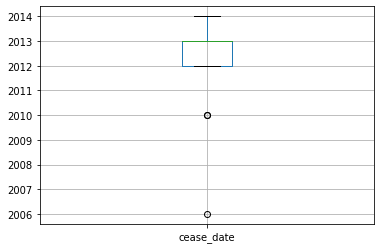

In [ ]:
dete_resignations.boxplot(column=['cease_date'])

In [ ]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending = False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

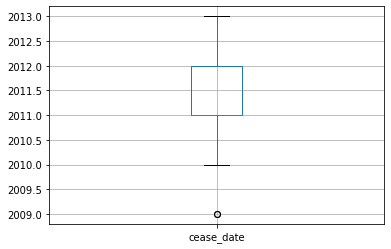

In [ ]:
tafe_resignations.boxplot(column=['cease_date'])

## Adding a column with period of employment

In [ ]:
dete_resignations[dete_resignations.cease_date < dete_resignations.dete_start_date].copy()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


In [ ]:
dete_resignations['institute_service'] = dete_resignations.cease_date - dete_resignations.dete_start_date
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


## Identifing dissatisfied employees

In [ ]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False) 

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [ ]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False) 

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [ ]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan 
    elif value == '-':
        return False
    else:
        return True

In [ ]:
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] .applymap(update_vals) .any(axis=1, skipna=False) )
tafe_resignations_up =  tafe_resignations.copy() 
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    int64  
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

In [ ]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [ ]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [ ]:
dete_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

## Comebining the data

In [ ]:
dete_resignations_up['institute'] = 'DATE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True) #set ignore_index on True to sort out indexes
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 57 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    int64  
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             308 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [ ]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
Employment Type. ����Employment Type                   290
CurrentAge. ����Current Age                            290
Gender. ����What is your Gender?                       290
Classification. ����Classification                     290
gender                                                 302
age                                                    3

In [ ]:
combined_updated = combined.dropna(axis=1, thresh=500).copy() #make copy to avoid SettingWithCopy Warning

combined_updated.head()

,id,separationtype,cease_date,institute_service,dissatisfied,institute
0,4,Resignation,2012.0,7,False,DATE
1,6,Resignation,2012.0,18,True,DATE
2,9,Resignation,2012.0,3,False,DATE
3,10,Resignation,2012.0,15,True,DATE
4,12,Resignation,2012.0,3,False,DATE


## Cleaning the service column

In [ ]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [ ]:
combined_updated['institute_service'] = (combined_updated['institute_service'].astype(str)  .str.extract('(\d+)') .astype(float))                                    
combined_updated['institute_service'].value_counts(dropna=False)      

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [ ]:
def set_category(value):
    if value < 3:
        return 'New'
    elif value >= 3 and value <= 6:
        return 'Experienced'
    elif value > 6 and value <=10:
        return 'Established'
    elif pd.isnull(value):
        return np.nan 
    else:
        return 'Veteran'
combined_updated['service_cat'] = combined_updated['institute_service'].apply(set_category)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Initial analysis

In [ ]:
combined_updated['dissatisfied'].value_counts(dropna=False) 

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

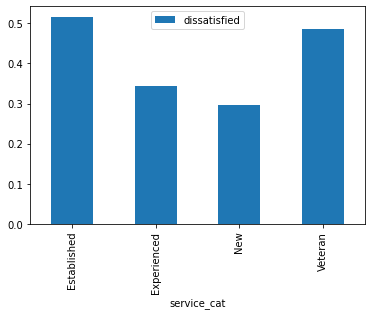

In [ ]:
dissatisfied_perc = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

%matplotlib inline 
dissatisfied_perc.plot(kind='bar')

# Data Cleaning in Python: Advanced (in progress)

# Data Cleaning Project Walkthrough (not yet)

# Command Line: Intermediate (not yet)

# Data Visualization in R (not yet)

# Data Cleaning in R (not yet)

# Data Cleaning in R: Advanced (not yet)

# Machine Learning Fundamentals in R (not yet)

# Machine Learning Fundamentals (not yet)

# Calculus For Machine Learning (not yet)

# Linear Regression For Machine Learning (not yet)

# Decision Trees (not yet)

# Deep Learning Fundamentals (not yet)

# Machine Learning Project (not yet)

# Kaggle Fundamentals (not yet)

# Functions: Advanced (not yet)

# Command Line: Intermediate (not yet)